In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Random state's seed
SEED = 825

Load Dataset

In [3]:
df = pd.read_csv("TrainDataset2024.csv")

In [4]:
df.head()

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [5]:
df.describe()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,...,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,12.697500,56.000208,51.804674,0.547500,2.902500,2.797500,2.830000,9.875000,6.562500,8.63250,...,3.957637e-01,3.911005e-01,2.722189e+00,0.003347,5.679717e+07,178.311246,32500.032620,0.056935,0.005965,0.029322
std,111.107417,27.137584,10.948522,0.498362,49.932114,49.937068,49.935558,86.092911,70.444284,86.20034,...,1.666319e-01,1.615922e-01,7.648849e-01,0.002419,7.063846e+08,1045.453432,177545.921568,0.047179,0.008379,0.115915
min,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,0.000000,38.000000,44.516769,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,...,3.199017e-01,3.184398e-01,2.340783e+00,0.001389,1.030473e+06,18.760570,0.001826,0.018628,0.000310,0.001464
50%,0.000000,55.000000,51.019507,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,...,4.095627e-01,4.054695e-01,2.814884e+00,0.002944,3.277334e+06,67.929659,0.004383,0.047740,0.002330,0.003276
75%,0.000000,73.000000,60.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.00000,...,5.000049e-01,4.956920e-01,3.304411e+00,0.004798,9.079686e+06,157.370294,0.013769,0.085321,0.007962,0.009479
max,999.000000,144.000000,79.603012,1.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 121 entries, ID to original_ngtdm_Strength
dtypes: float64(108), int64(12), object(1)
memory usage: 378.2+ KB


In [7]:
df.drop("ID", axis=1, inplace=True)
df.head()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,144.0,41.0,0,0,0,1,3,3,1,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,0,142.0,39.0,1,1,0,0,3,3,1,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,1,135.0,31.0,0,0,0,1,2,1,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0,12.0,35.0,0,0,0,1,3,3,1,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,0,109.0,61.0,1,0,0,0,2,1,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


Data Imputation

In [8]:
df.replace(999, np.nan, inplace=True)

In [9]:
y_class = df["pCR (outcome)"]
y_reg = df["RelapseFreeSurvival (outcome)"]
df.drop("pCR (outcome)", axis=1, inplace=True)
df.drop("RelapseFreeSurvival (outcome)", axis=1, inplace=True)

In [10]:
df.head()

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,2,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,39.0,1,1.0,0.0,0.0,3.0,3.0,1.0,1.0,2,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,31.0,0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,2,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,35.0,0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,61.0,1,0.0,0.0,0.0,2.0,1.0,1.0,0.0,2,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


Split Clinical and MRI Features

In [11]:
X_clinical = df.iloc[:, :11]
X_mri = df.iloc[:, 11:]  

In [12]:
print(y_class.isnull().sum())
print(X_clinical.isnull().sum())
print(X_mri.isnull().sum())

5
Age                 0
ER                  0
PgR                 1
HER2                1
TrippleNegative     1
ChemoGrade          3
Proliferation       2
HistologyType       3
LNStatus            1
TumourStage         0
Gene               88
dtype: int64
original_shape_Elongation                 0
original_shape_Flatness                   0
original_shape_LeastAxisLength            0
original_shape_MajorAxisLength            0
original_shape_Maximum2DDiameterColumn    0
                                         ..
original_ngtdm_Busyness                   0
original_ngtdm_Coarseness                 0
original_ngtdm_Complexity                 0
original_ngtdm_Contrast                   0
original_ngtdm_Strength                   0
Length: 107, dtype: int64


Most Frequent

In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

y_class_1D = y_class.values.reshape(-1, 1)
y_class_1D = imputer.fit_transform(y_class_1D)
y_class = pd.Series(y_class_1D.flatten())

X_clinical = pd.DataFrame(imputer.fit_transform(X_clinical), columns=X_clinical.columns)

KNN

In [14]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)

X_mri = pd.DataFrame(knn_imputer.fit_transform(X_mri), columns=X_mri.columns)

In [15]:
print(y_class.isnull().sum())
print(X_clinical.isnull().sum())
print(X_mri.isnull().sum())

0
Age                0
ER                 0
PgR                0
HER2               0
TrippleNegative    0
ChemoGrade         0
Proliferation      0
HistologyType      0
LNStatus           0
TumourStage        0
Gene               0
dtype: int64
original_shape_Elongation                 0
original_shape_Flatness                   0
original_shape_LeastAxisLength            0
original_shape_MajorAxisLength            0
original_shape_Maximum2DDiameterColumn    0
                                         ..
original_ngtdm_Busyness                   0
original_ngtdm_Coarseness                 0
original_ngtdm_Complexity                 0
original_ngtdm_Contrast                   0
original_ngtdm_Strength                   0
Length: 107, dtype: int64


0.0    316
1.0     84
Name: count, dtype: int64


<Axes: xlabel='None', ylabel='count'>

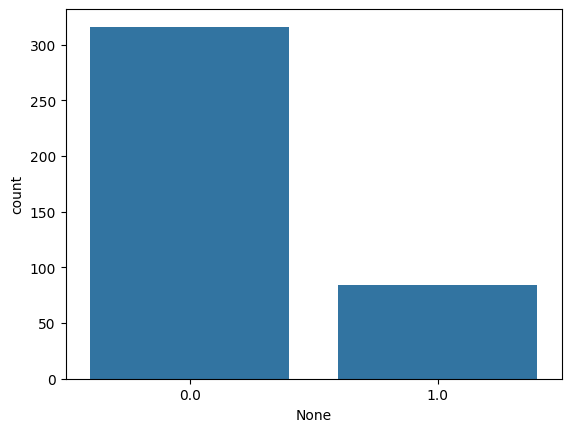

In [16]:
import seaborn as sns

print(y_class.value_counts())
sns.countplot(x=y_class)

Recursive Feature Elimination (RFE) on Clinical Features

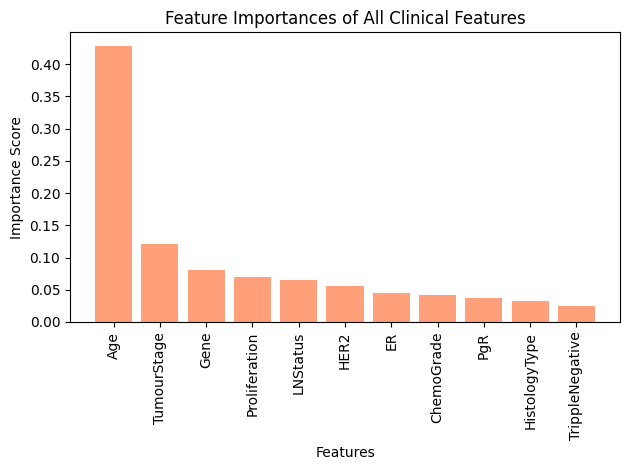

In [17]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

model_all = RandomForestClassifier(random_state=SEED)
model_all.fit(X_clinical, y_class)

all_importances = model_all.feature_importances_
indices = np.argsort(all_importances)[::-1]

plt.figure()
plt.title("Feature Importances of All Clinical Features")
plt.bar(X_clinical.columns[indices], all_importances[indices], color="lightsalmon", align="center")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [18]:
model = RandomForestClassifier(random_state=SEED)

rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_clinical, y_class)

selected_features = X_clinical.columns[rfecv.support_]
print("Optimal Number of Features:", rfecv.n_features_)
print("Selected Features:")
print(selected_features)

Optimal Number of Features: 8
Selected Features:
Index(['Age', 'ER', 'HER2', 'ChemoGrade', 'Proliferation', 'LNStatus',
       'TumourStage', 'Gene'],
      dtype='object')


In [19]:
X_clinical_fs = X_clinical[selected_features]

Dimensionality Reduction on MRI Features

Linear Discriminant Analysis (LDA)

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=None)

X_mri_dr = lda.fit_transform(X_mri, y_class)

print("Number of Components Selected:", lda.explained_variance_ratio_.shape[0])


Number of Components Selected: 1


Principal Component Analysis (PCA)

In [21]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=0.95)
# X_mri_dr = pca.fit_transform(X_mri)

# print("Number of Components Selected:", pca.n_components_)

In [22]:
print(X_clinical_fs.shape, type(X_clinical_fs))
print(X_mri_dr.shape, type(X_mri_dr))

(400, 8) <class 'pandas.core.frame.DataFrame'>
(400, 1) <class 'numpy.ndarray'>


In [23]:
X = np.hstack((X_clinical_fs.values, X_mri_dr))

In [24]:
X.shape, type(X.shape)

((400, 9), tuple)

Z-score Distribution

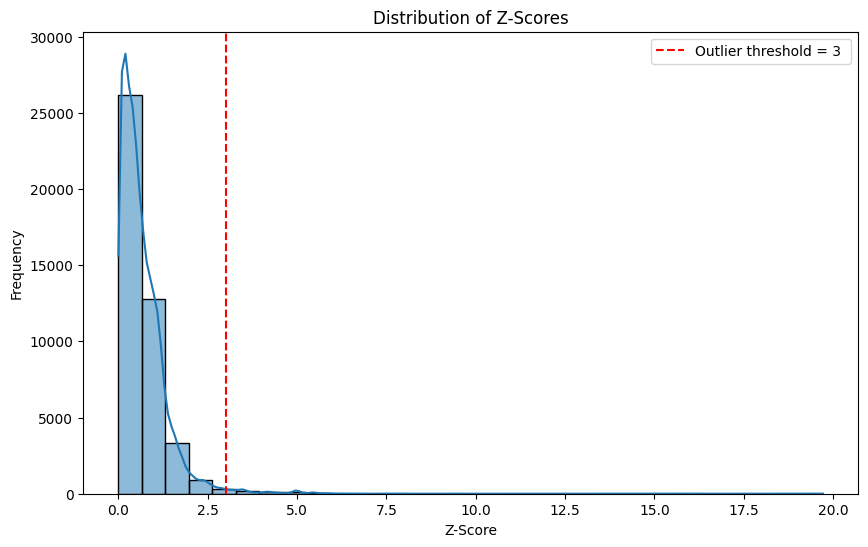

In [25]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df))
z_scores = z_scores.to_numpy()
z_scores_flat = z_scores.flatten()

plt.figure(figsize=(10, 6))
sns.histplot(z_scores_flat, bins=30, kde=True)
plt.title("Distribution of Z-Scores")
plt.xlabel("Z-Score")
plt.ylabel("Frequency")
plt.axvline(x=3, color='r', linestyle='--', label="Outlier threshold = 3 ")
plt.legend()
plt.show()

Data Splitting

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.20, random_state=SEED, stratify=y_class)

Data Synthesis

Random Oversampling and SMOTE

In [27]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

synthesis_mode = 2

if synthesis_mode == 0:
    # Reset index (causing data loss)
    X_train_reset = pd.DataFrame(X_train).reset_index(drop=True)
    y_train_reset = pd.Series(y_train, name="class").reset_index(drop=True)

    train_data = pd.concat([X_train_reset, y_train_reset], axis=1)

    # print("Missing values:", pd.DataFrame(train_data).isnull().sum().sum())

    non_cancer_train = train_data[train_data["class"] == 0]
    cancer_train = train_data[train_data["class"] == 1]

    cancer_resample_train = resample(cancer_train, replace=True, n_samples=len(non_cancer_train), random_state=SEED)

    balanced_train_data = pd.concat([non_cancer_train, cancer_resample_train])
    balanced_train_data = balanced_train_data.sample(frac=1, random_state=SEED).reset_index(drop=True)

    X_train = balanced_train_data.drop(columns=["class"]).to_numpy()
    y_train = balanced_train_data["class"].to_numpy()
elif synthesis_mode == 1:
    smote = SMOTE(sampling_strategy='auto', random_state=SEED)

    X_train, y_train = smote.fit_resample(X_train, y_train)
else:
    print("No data synthesis")

No data synthesis


Standardise Data (GBC doesn't need standardised data but SVM does)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Calculate Sample Weights

In [29]:
# Calculate class weights
class_counts = np.bincount(y_train.astype(int))
total_samples = len(y_train)
num_classes = len(class_counts)

class_weights = {}
for i, count in enumerate(class_counts):
    class_weights[i] = total_samples / (num_classes * count)

# Assign weights to each sample
sample_weights = []
for label in y_train:
    sample_weights.append(class_weights[int(label)])
sample_weights = np.array(sample_weights)

Gradient Boosting Classifier

Grid Search

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Set True to run grid search
run_gridsearch = False
if run_gridsearch:
    param_grid = {
        'loss': ['log_loss', 'exponential'],
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 1.0],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2, 4]
    }

    gbc = GradientBoostingClassifier(random_state=SEED)

    stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

    grid_search = GridSearchCV(gbc, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    print(f"Best parameters: {grid_search.best_params_}")
run_gridsearch = False

In [31]:
gbc = GradientBoostingClassifier(
    learning_rate=0.1,
    loss='log_loss',
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=50,
    subsample=1.0,
    random_state=SEED
)

gbc.fit(X_train, y_train, sample_weight=sample_weights)
y_pred = gbc.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90        63
         1.0       0.63      0.71      0.67        17

    accuracy                           0.85        80
   macro avg       0.77      0.80      0.78        80
weighted avg       0.86      0.85      0.85        80

Confusion Matrix:
[[56  7]
 [ 5 12]]


ROC Curve

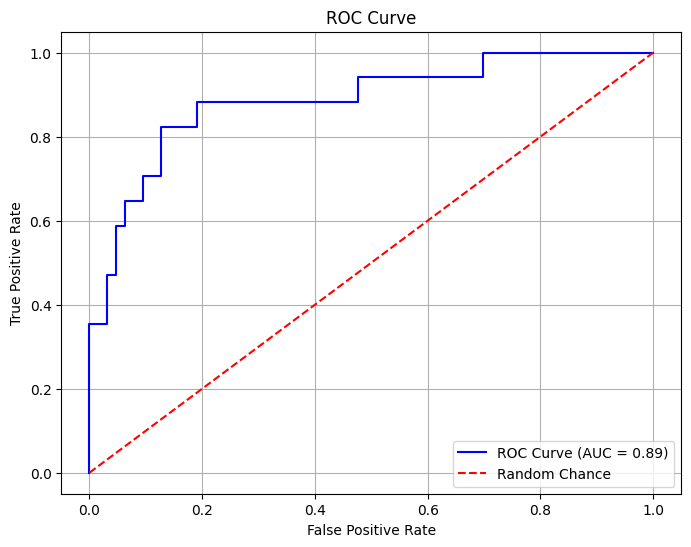

In [32]:
# Calculate ROC curve
y_pred_proba = gbc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Chance')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Support Vector Machine (SVM)

Grid Search

In [33]:
from sklearn.svm import SVC

# Set True to run grid search
run_gridsearch = False
if run_gridsearch:
    param_grid = {
        'C': [0.1, 1, 10, 100, 200],             
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
        'class_weight': ['balanced', None]
    }

    svm = SVC(probability=True, random_state=SEED)

    stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

    grid_search = GridSearchCV(svm, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_svm = grid_search.best_estimator_

    print(f"Best parameters: {best_params}")
run_gridsearch = False

In [34]:
svm = SVC(
    C=1,
    class_weight=None,
    gamma='scale',
    kernel='linear',
    probability=True,
    random_state=SEED
)

svm.fit(X_train, y_train, sample_weight=sample_weights)
y_pred = svm.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90        63
         1.0       0.61      0.82      0.70        17

    accuracy                           0.85        80
   macro avg       0.78      0.84      0.80        80
weighted avg       0.88      0.85      0.86        80

Confusion Matrix:
[[54  9]
 [ 3 14]]


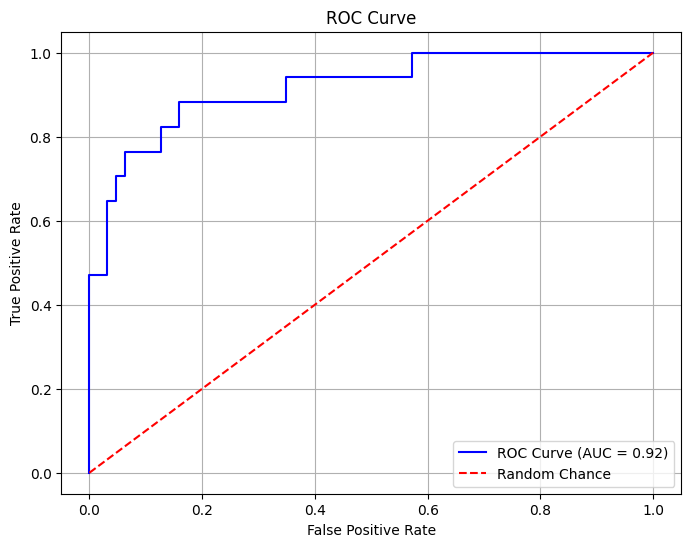

In [35]:
# Calculate ROC curve
y_pred_proba = svm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Chance')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()